# PDF Text Extractor and Summarizer
### Mt. SAC CISB 63 Midterm Project - Fall 2023
### Russell Luna

Summary/Explanation of Project

The goal of this project was to pull text from a PDF and create summaries of the extracted content. It utilized various natural language processing techniques, such as part-of-speech tagging (POS), named entity recognition (NER), translation, frequency distributions, word clouds, and tokenization. First, I utilized PyPDF2 to extract the text from the PDF. Then, tokenize the extracted sentences into individual words to identify the most frequently used words and determine the significance of sentences for generating word clouds and TF-IDF scores. To enhance entity visualization, I used displacy, which helped visualize entities such as organizations. Finally, we used Matplotlib to plot the graph for our frequency distribution (fdist).

In [1]:
import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Extract text
def extract_text_from_pdf(pdf_path, start_page=23, end_page=35):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in range(start_page-1, end_page):
            text += reader.pages[page].extract_text()
    sentences = nltk.sent_tokenize(text)
    return sentences

# Add PDF file
pdf_file = 'Maxwell Maltz - Psycho-Cybernetics_ Updated and Expanded Paperback – November 3, 2015.pdf'
sentences = extract_text_from_pdf(pdf_file)

# Create a list of sentences
text_array = [sentence.strip() for sentence in sentences]
text_string = ". ".join(text_array)

# Initialize the vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(text_array)

# Print the sentences
for sentence in sentences:
    print(sentence)

DONE
The Self-Image: Your Key to a Better Life
uring the past decade a revolution has been quietly going on in the
fields of psychology, psychiatry, and medicine.
New theories and concepts concerning the “self” have grown out of
the work and findings of clinical psychologists, practicing psychiatrists,
and cosmetic or so-called plastic surgeons.
New methods growing out of
these findings have resulted in rather dramatic changes in personality,
health, and apparently even in basic abilities and talents.
Chronic failures
have become successful.
“F” students have changed into “straight A”
pupils within a matter of days and with no extra tutoring.
Shy, retiring,
inhibited personalities have become happy and outgoing.
Writing in the January 1959 issue of Cosmopolitan magazine, T. F.
James summarizes the results obtained by various psychologists and
MDs as follows:
Understanding the psychology of the self can mean the difference
between success and failure, love and hate, bitterness and
happi

In [2]:
# Preprocess the text (remove punctuation and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The function takes a string of text as input and performs several text preprocessing steps on that input text

### words = word_tokenize(text)
- This step tokenizes the text, separating it into words based on spaces and punctuation.

word.lower(): 
- It converts each word to lowercase. This helps ensure that the text is case-insensitive, so "Word" and "word" are treated as the same.

for word in words if word.isalnum(): 
- It filters out words that are not composed entirely of alphabetical characters. The word.isalnum() method checks if a word contains only alphanumeric characters (letters and numbers) and no special characters or punctuation. This step removes non-alphabetic characters from the words.

words = [word for word in words if word not in stop_words]
- This line removes common stop words from the list of words. It appears that there is a pre-defined list of stop words stored in the variable stop_words. Stop words are words like "the," "a," "an," "in," etc., which are often filtered out in natural language processing tasks because they are very common and often do not provide significant meaning to the text.

return ' '.join(words)
- The preprocessed words are joined back into a single string with spaces between them, effectively turning the list of words into a preprocessed text. This string is then returned as the output of the preprocess_text function.

In [3]:
def preprocess_text(sentences):
    words = word_tokenize(sentences)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [4]:
#cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)

def preprocess_text(sentences):
    # Tokenize the text into words
    words = word_tokenize(sentences)

    # Replace non-alphabetical characters with spaces using regular expression
    cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', sentences)
    # Tokenize the cleaned sentence into words
    cleaned_words = word_tokenize(cleaned_sentence)

    # Convert words to lowercase, filter out non-alphabetical characters, and remove stop words
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)

In [5]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [6]:
print(sentences)

['DONE\nThe Self-Image: Your Key to a Better Life\nuring the past decade a revolution has been quietly going on in the\nfields of psychology, psychiatry, and medicine.', 'New theories and concepts concerning the “self” have grown out of\nthe work and findings of clinical psychologists, practicing psychiatrists,\nand cosmetic or so-called plastic surgeons.', 'New methods growing out of\nthese findings have resulted in rather dramatic changes in personality,\nhealth, and apparently even in basic abilities and talents.', 'Chronic failures\nhave become successful.', '“F” students have changed into “straight A”\npupils within a matter of days and with no extra tutoring.', 'Shy, retiring,\ninhibited personalities have become happy and outgoing.', 'Writing in the January 1959 issue of Cosmopolitan magazine, T. F.\nJames summarizes the results obtained by various psychologists and\nMDs as follows:\nUnderstanding the psychology of the self can mean the difference\nbetween success and failure, l

In [7]:
# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

In [8]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-12:]

In [9]:
top_sentence_indices

matrix([[ 62],
        [188],
        [ 67],
        [199],
        [ 76],
        [ 44],
        [  7],
        [ 39],
        [110],
        [108],
        [168],
        [198]], dtype=int64)

In [10]:
sentences[0]

'DONE\nThe Self-Image: Your Key to a Better Life\nuring the past decade a revolution has been quietly going on in the\nfields of psychology, psychiatry, and medicine.'

In [11]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]
    #print(index, val)
    #top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val)
    print(summary)

DONE
The Self-Image: Your Key to a Better Life
uring the past decade a revolution has been quietly going on in the
fields of psychology, psychiatry, and medicine.
New theories and concepts concerning the “self” have grown out of
the work and findings of clinical psychologists, practicing psychiatrists,
and cosmetic or so-called plastic surgeons.
New methods growing out of
these findings have resulted in rather dramatic changes in personality,
health, and apparently even in basic abilities and talents.
Chronic failures
have become successful.
“F” students have changed into “straight A”
pupils within a matter of days and with no extra tutoring.
Shy, retiring,
inhibited personalities have become happy and outgoing.
Writing in the January 1959 issue of Cosmopolitan magazine, T. F.
James summarizes the results obtained by various psychologists and
MDs as follows:
Understanding the psychology of the self can mean the difference
between success and failure, love and hate, bitterness and
happi

### Adding WordCloud

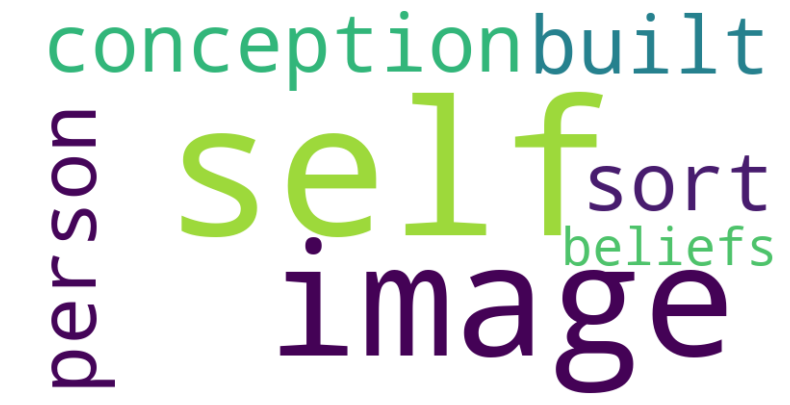

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

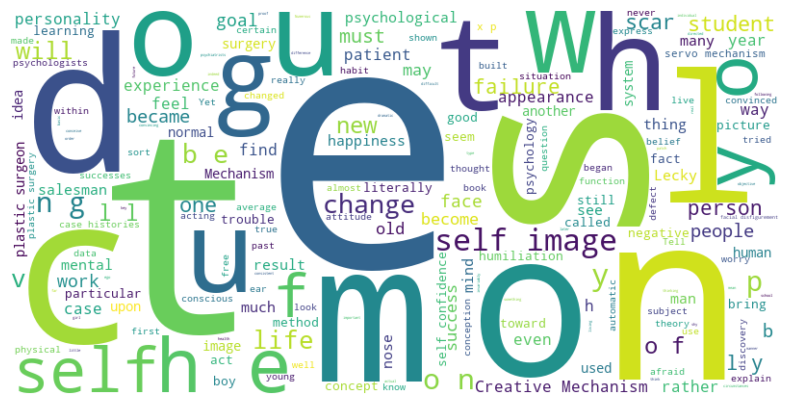

In [13]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
#!pip install textblob

In [15]:
from textblob import TextBlob

In [16]:
# Create a TextBlob object with the text
blob = TextBlob(summary)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'es')

# Print the translated text
print(translated_blob)

Esta autoimagen es nuestra propia concepción del "tipo de persona que soy".
Se ha construido a partir de nuestras propias creencias sobre nosotros mismos.


In [17]:
#!pip install -U spacy

In [18]:
#!python -m spacy download en_core_web_sm

In [19]:
text = "A boy who was dropped from one college because of poor grades entered Columbia and became a straight “A” student. A girl who had flunked Latin four times, after three talks with the school counselor, finished with a grade of 84. A boy who was told by a testing bureau that he had no aptitude for English won an honorable mention the next year for a literary prize. The trouble with these students was not that they were dumb or lacking in basic aptitudes."

In [20]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
# Import the displaCy library
from spacy import displacy

In [22]:
doc = nlp(text)
displacy.render(doc, style='ent', jupyter=True)

### Customizing Colors and Effects

- You can also pass background color and gradient options:

In [23]:
colors = {'ORG': 'linear-gradient(135deg, orange 60%, cyan)', 'CARDINAL': 'radial-gradient(#e66465, #9198e5)'}

options = {'ents': ['ORG', 'CARDINAL'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)

### POS

In [24]:
words = word_tokenize(summary)

In [25]:
nltk.pos_tag(words)

[('This', 'DT'),
 ('self-image', 'NN'),
 ('is', 'VBZ'),
 ('our', 'PRP$'),
 ('own', 'JJ'),
 ('conception', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('“', 'NNP'),
 ('sort', 'NN'),
 ('of', 'IN'),
 ('person', 'NN'),
 ('I', 'PRP'),
 ('am.', 'VBP'),
 ('”', 'VBG'),
 ('It', 'PRP'),
 ('has', 'VBZ'),
 ('been', 'VBN'),
 ('built', 'VBN'),
 ('up', 'RP'),
 ('from', 'IN'),
 ('our', 'PRP$'),
 ('own', 'JJ'),
 ('beliefs', 'NN'),
 ('about', 'IN'),
 ('ourselves', 'NNS'),
 ('.', '.')]

In [26]:
#How many words are there? :
print (len(words))

27


In [27]:
#Import required libraries :
from nltk.probability import FreqDist

In [28]:
#Find the frequency :
fdist = FreqDist(words)

In [29]:
#Print 10 most common words :
fdist.most_common(10)

[('our', 2),
 ('own', 2),
 ('of', 2),
 ('This', 1),
 ('self-image', 1),
 ('is', 1),
 ('conception', 1),
 ('the', 1),
 ('“', 1),
 ('sort', 1)]

In [30]:
#Plot the graph for fdist :
import matplotlib.pyplot as plt
%matplotlib inline

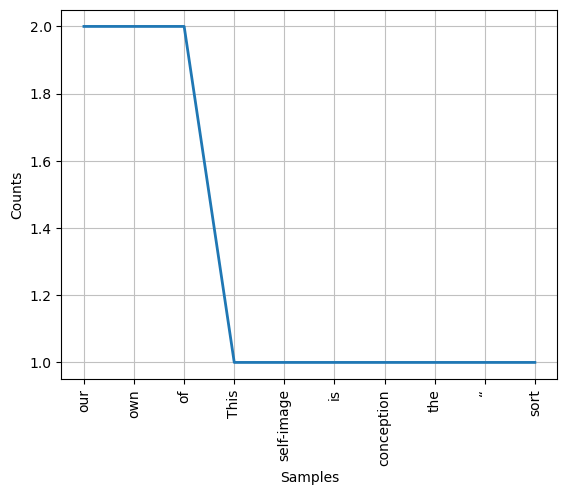

<Axes: xlabel='Samples', ylabel='Counts'>

In [31]:
fdist.plot(10)

Conclusion

In general, I believe the program performed quite well. The only area I would focus on improving in a future attempt is the extraction of the actual text. The source PDF used a lot of capitalization in its section titles and strange header formatting, which caused some issues during the conversion process and led to a less organized summarization of the selected pages. Apart from this minor issue of formatting, everything else worked perfectly.

Maltz, M. (2015). Psycho-Cybernetics: Updated and Expanded. Penguin.